# First task: Data understanding

We have two datasets to analyze:
- **cyclists.csv**: contains the information about all the cyclists;
- **races.csv**: contains the information about all the cyclism races.



## Import of all the libraries and the dataset

In the following, we import all the main libraries needed to this project and we read the .cvs files that contin the data. The data are assigned to Pandas dataframe with the name of cyclists and races.

In [818]:
import warnings
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

import os

#reading the dataset
cyclists = pd.read_csv('./dataset/cyclists.csv')
races = pd.read_csv('./dataset/races.csv')

## Cyclists dataset

We begin the understanding of our data showing the first five rows of the cyclists dataset. It is composed by 6 attributes:
- **_url**: identifier of the cyclist;
- **name**: full name of the cyclist;
- **birth_year**: year of birth of the cyclist;
- **weight**: weigth of the cyclist;
- **height**: height of the cyclist;
- **nationality**: nationality of the cyclist.

Then we show general information about the values of the dataset.

In [819]:
cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [820]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


Before analyzing the values we show that there aren't duplicated rows in the dataset that could influence further studies.

In [821]:
print(f"Number of duplicated rows in cyclists dataset: {cyclists.duplicated().sum()}")

Number of duplicated rows in cyclists dataset: 0


We can see that _url and name entry have no null value, birth_year and nationality have few null entry while weight and height have half of value null. More precisely:

In [822]:
cyclists_null = cyclists.isnull().sum()
print("Number of null values in each column:\n")
print(cyclists_null)

Number of null values in each column:

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64


To conclude a general view about the cyclist dataset values, we use the *.describe()* method to get some hight level statistics of the numerical entries.

In [823]:
cyclists.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


### Data cleaning

After the previous analysis we decide to cleaning the data with the aim of handling missing values, correcting inconsistencies and ensuring data integrity.

First of all we decide to remove the multiple spaces inside the *name* attribute in this way

In [824]:
cyclists['name'] = cyclists['name'].str.replace(r'\s+', ' ', regex=True).str.strip()
cyclists['name'] = cyclists['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Then we decide to rewrite the missing values of *weight* and *height* with -1 standard value. We also cast all the values to float.

In [825]:
cyclists['weight'] = cyclists['weight'].fillna(-1)
cyclists['height'] = cyclists['height'].fillna(-1)

cyclists['weight'] = cyclists['weight'].astype(float)
cyclists['height'] = cyclists['height'].astype(float)

Also the missing values of *birth_year* are replaced with NaN and all the value are casted to int without loss of information

In [826]:
cyclists['birth_year'] = cyclists['birth_year'].fillna(0)
cyclists['birth_year'] = cyclists['birth_year'].astype(int)

We decide to drop the entry with *name* or *nationality* as missing value.

In [827]:
cyclists = cyclists.dropna(subset=['name', 'nationality'])

cyclists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6133 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6133 non-null   object 
 1   name         6133 non-null   object 
 2   birth_year   6133 non-null   int64  
 3   weight       6133 non-null   float64
 4   height       6133 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 335.4+ KB


Now we check if we have values that are not plausible.

In [828]:
invalid_birth_year = cyclists[cyclists['birth_year'] < 1900 | (cyclists['birth_year'] > 2024)]
print(f"Number of invalid birth_year: {len(invalid_birth_year)}")
print(invalid_birth_year)

## TODO: Fix the invalid birth year

invalid_height = cyclists[((cyclists['height'] < 100) | (cyclists['height'] > 220)) & (cyclists['height'] != -1)]
print(f"Number of invalid height: {len(invalid_height)}")

invalid_weight = cyclists[((cyclists['weight'] < 30) | (cyclists['weight'] > 150)) & (cyclists['weight'] != -1)]
print(f"Number of invalid weight: {len(invalid_weight)}")


Number of invalid birth_year: 12
                    _url                name  birth_year  weight  height  \
601     vladimir-malakov    Vladimir Malakov           0    -1.0    -1.0   
894       antonio-zanini      Antonio Zanini           0    -1.0    -1.0   
2408   filippo-simonetti   Filippo Simonetti           0    -1.0    -1.0   
2515       carlos-garcia       Carlos Garcia           0    -1.0    -1.0   
2536     alexandr-osipov     Alexandr Osipov           0    -1.0    -1.0   
3046    nicolai-kosyakov    Nicolai Kosyakov           0    -1.0    -1.0   
3551          nevens-guy          Guy Nevens           0    -1.0    -1.0   
4142         oscar-pumar         Oscar Pumar           0    -1.0    -1.0   
4384       javier-luquin       Javier Luquin           0    -1.0    -1.0   
4756      thierry-lauder      Thierry Lauder           0    -1.0    -1.0   
6072  sergei-jermachenko  Sergei Jermachenko           0    -1.0    -1.0   
6080     batik-odriozola     Batik Odriozola           

## Races dataset

The races dataset is composed by the following attributes:
- **_url**: identifier for the race, typically includes the race name, year, and stage.
- **name**: the official name of the race (e.g., "Tour de France").
- **points**: points assigned to the race, indicating its prestige or importance.
- **uci_points**: alternative points assigned based on UCI rankings.
- **length**: the total distance of the race, usually in meters.
- **climb_total**: the total meters climbed during the race, indicating elevation difficulty.
- **profile**: the race's terrain profile, such as flat, hilly, mountainous, or mixed.
- **startlist_quality**: the quality or strength of the participants in the race.
- **average_temperature**: the average temperature during the race, typically in degrees Celsius.
- **date**: the date on which the race took place.
- **position**: the final position or ranking of a specific cyclist in the race.
- **cyclist**: the unique identifier for the cyclist (_url attribute in the cyclists table).
- **cyclist_age**: the age of the cyclist during the race.
- **is_tarmac**: indicates if the race was held on tarmac surfaces.
- **is_cobbled**: indicates if the race featured cobbled sections.
- **is_gravel**: indicates if the race included gravel sections.
- **cyclist_team**: the team the cyclist was part of during the race.
- **delta**: the time difference in seconds between the cyclist and the race winner.

In [829]:
races.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


In [830]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

Also in this dataset we show that there aren't duplicated rows.

In [831]:
print(f"Number of duplicated rows in races dataset: {races.duplicated().sum()}")

Number of duplicated rows in races dataset: 0


We can see that more than half of uci_points and average_temperature values are null, also climb_total, profile and cyclist_team have concerning number of null values. All the other entry have almost all non-null values. More precisely: 

In [832]:
races_null = races.isnull().sum()
print("Number of null values in each column:\n")
print(races_null)

Number of null values in each column:

_url                        0
name                        0
points                    477
uci_points             338779
length                      0
climb_total            147045
profile                148194
startlist_quality           0
average_temperature    559932
date                        0
position                    0
cyclist                     0
cyclist_age               113
is_tarmac                   0
is_cobbled                  0
is_gravel                   0
cyclist_team           159161
delta                       0
dtype: int64


To end this preliminary analysis, we use the *.describe()* method to get some hight level statistics of the numerical entries of the races dataset.

In [833]:
races.describe()

,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,position,cyclist_age,delta
count,589388.000000,251086.000000,589865.000000,442820.000000,441671.000000,589865.000000,29933.000000,589865.000000,589752.000000,589865.000000
mean,89.221635,74.601547,166776.180584,2330.469215,2.611611,1101.161178,21.731768,74.219491,28.486208,418.292794
std,54.435330,100.947962,64545.605664,1375.710722,1.491741,380.586928,5.884761,48.404023,3.855631,842.961596
min,18.000000,6.000000,1000.000000,2.000000,1.000000,115.000000,10.000000,0.000000,13.000000,-6906.000000
25%,50.000000,16.000000,152500.000000,1309.000000,1.000000,844.000000,17.000000,32.000000,26.000000,10.000000
50%,80.000000,60.000000,178200.000000,2255.000000,2.000000,988.000000,22.000000,70.000000,28.000000,156.000000
75%,100.000000,100.000000,203500.000000,3273.000000,4.000000,1309.000000,26.000000,112.000000,31.000000,624.000000
max,350.000000,800.000000,338000.000000,6974.000000,5.000000,2047.000000,36.000000,209.000000,56.000000,61547.000000


### Data cleaning

As done for the cyclists dataset, we make the cleaning of the races dataset. To start we convert the data types.

In [834]:
# converting data types in numeric: 
races['points'] = pd.to_numeric(races['points'], errors='coerce')
races['uci_points'] = pd.to_numeric(races['uci_points'], errors='coerce')
races['length'] = pd.to_numeric(races['length'], errors='coerce')
races['climb_total'] = pd.to_numeric(races['climb_total'], errors='coerce')
races['cyclist_age'] = pd.to_numeric(races['cyclist_age'], errors='coerce')



Now we can check and handle the invalid and missing values.

In [835]:
invalid_points = races[races['points'] < 0]
print(f"Number of invalid points: {len(invalid_points)}")

invalid_uci_points = races[races['uci_points'] < 0]
print(f"Number of invalid uci_points: {len(invalid_uci_points)}")

invalid_length = races[(races['length'] < 0) | (races['length'] > 400000)]
print(f"Number of invalid length: {len(invalid_length)}")

invalid_climb_total = races[(races['climb_total'] < 0) | (races['climb_total'] > 10000)]
print(f"Number of invalid climb_total: {len(invalid_climb_total)}")

races['cyclist_age'] = races['cyclist_age'].fillna(-1)
races['cyclist_age'] = races['cyclist_age'].astype(int)
invalid_ages = races[((races['cyclist_age'] < 13) | (races['cyclist_age'] > 50))]
invalid_ages = invalid_ages[invalid_ages['cyclist_age'] != -1]
print(f"Number of invalid cyclist_age: {len(invalid_ages)}")
#print(invalid_ages) # TODO: fix age (non è la sua vera età)

missing_teams = races[races['cyclist_team'].isnull()]
print(f"Number of missing teams: {len(missing_teams)}")
# races['cyclist_team'].fillna('Unknown', inplace=True)
# TODO: fix missing teams

Number of invalid points: 0
Number of invalid uci_points: 0
Number of invalid length: 0
Number of invalid climb_total: 0
Number of invalid cyclist_age: 1
Number of missing teams: 159161


In [836]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589865 non-null  int64  
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

## TASK 1.2:

## Analysis of the data distribution



<Axes: xlabel='birth_year', ylabel='height'>

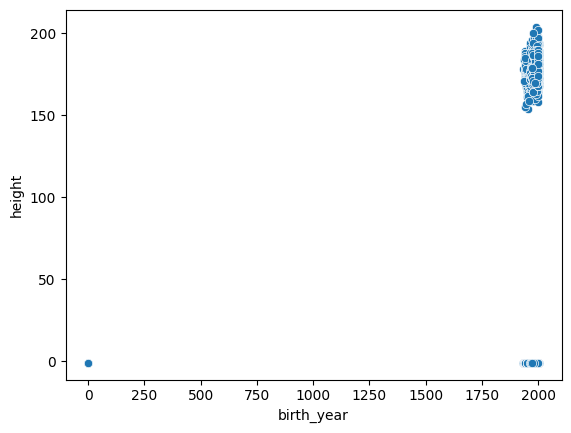

In [837]:
sns.scatterplot(data=cyclists, x='birth_year', y='height')

<Axes: xlabel='birth_year'>

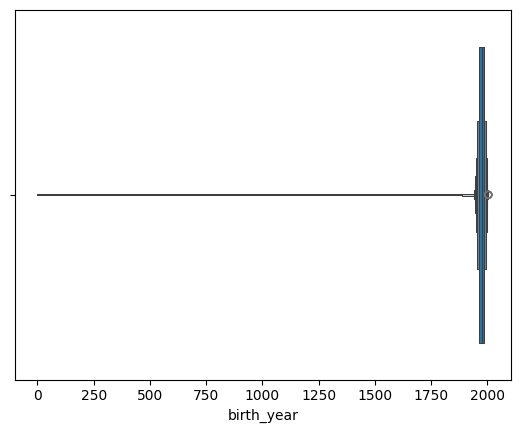

In [838]:
sns.boxenplot(data=cyclists, x='birth_year')